# Economic mobility data


## Data Description
We have data on different college's characteristics and we also have the socio-economic outcome of graduates from that school.


## Data description

https://opportunityinsights.org/wp-content/uploads/2018/04/Codebook-MRC-Table-8.pdf

## Analysis

### General goal
We want to figure out the facrtors of a college that contributes towards social mobility.


#### Determinants of social mobility

1. We want to create a social mobility index using the variables collected in the data
2. We want to build a simple linear regresssion to discover what are some of the factors and characteristics of colleges that contribute to their graduates' social mobility


#### Trend
1. We want to find the coefficient / effect of these determinants

#### Important fields
mr_kq5_pq1 = Mobility rate (joint probability of parents in bottom quintile and child in top quintile of the income distribution)
mr_ktop1_pq1 = Upper-tail mobility rate (joint probability of parents in bottom quintile and child in top 1% of the income distribution)

Questions to the crowd - what do you think are some characteristics of schools that are important for social and economic mobility

Reading the data

In [42]:
import pandas as pd
import statsmodels.formula.api as smf

income_college = pd.read_csv('mrc_table2.csv')
college_characteristics = pd.read_csv('mrc_table10.csv')
cols_to_use = list(college_characteristics.columns.difference(income_college.columns)) + ['super_opeid']


In [24]:
df= income_college.merge(college_characteristics[cols_to_use], on='super_opeid')

df.co


1) Ran a regression on median earning, using rejection rate to proxy for tiers of schools

In [64]:
regression = smf.ols('k_median_nozero ~ par_median  + scorecard_rej_rate_2013 + sticker_price_2013' , data=df).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        k_median_nozero   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     355.8
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          5.68e-166
Time:                        17:35:32   Log-Likelihood:                -12908.
No. Observations:                1224   AIC:                         2.582e+04
Df Residuals:                    1220   BIC:                         2.585e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.964e+04    903.038     21.752      0.000    1.79e+04    2.14e+04
par_median                  0.2497      0.012     21.572      0.000       0.227       0.272
scorecard_rej_rate_2013  1.058e+04   1495.155      7.078      0.000    7649.095    1.35e+04
sticker_price_2013          0.0573      0.025      2.336      0.020       0.009       0.105
==============================================================================
Omnibus:                      558.930   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6539.185
Skew:                           1.797   Prob(JB):                         0.00
Kurtosis:                      13.738   Cond. No.                     5.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2) Ran a regression on median earning, using dummy variables for tiers of schools

In [58]:
regression = smf.ols('k_median ~  scorecard_netprice_2013 + endowment_pc_2000  +asian_or_pacific_share_fall_2000 + black_share_fall_2000 + hisp_share_fall_2000  + alien_share_fall_2000 +pct_arthuman_2000 +pct_business_2000 +pct_publicsocial_2000 +pct_stem_2000 +pct_socialscience_2000 +pct_tradepersonal_2000 + C(tier_name) + C(hbcu)' , data=df).fit()
#regression = smf.ols('k_median_nozero ~  scorecard_netprice_2013 + endowment_pc_2000  +asian_or_pacific_share_fall_2000 + black_share_fall_2000 + hisp_share_fall_2000  + alien_share_fall_2000 +pct_arthuman_2000 +pct_business_2000 +pct_publicsocial_2000 +pct_stem_2000 +pct_socialscience_2000 +pct_tradepersonal_2000 + C(tier_name) + C(hbcu)' , data=df).fit()



p_vals = regression.summary().tables[1]
p_vals = pd.DataFrame(p_vals)
p_vals.columns = ["col", "coef", "std_err", "t", "p_val", 0.25, 0.975]
p_vals = p_vals.iloc[1:]
p_vals = p_vals.set_index("col")
p_vals.p_val = p_vals.p_val.apply(str).apply(float)
p_vals.loc[p_vals.p_val <= 0.05]

,coef,std_err,t,p_val,0.25,0.975
col,,,,,,
Intercept,2.91e+04,1298.008,22.422,0.000,2.66e+04,3.17e+04
C(tier_name)[T.Highly selective private],-9.473e-08,8.71e-09,-10.880,0.000,-1.12e-07,-7.76e-08
C(tier_name)[T.Highly selective public],1.463e+04,1510.138,9.686,0.000,1.17e+04,1.76e+04
C(tier_name)[T.Nonselective four-year private not-for-profit],-1.396e-10,2.78e-11,-5.030,0.000,-1.94e-10,-8.51e-11
C(tier_name)[T.Nonselective four-year public],-2564.7572,1132.473,-2.265,0.024,-4788.214,-341.300
C(tier_name)[T.Other elite schools (public and private)],2.194e+04,2535.573,8.653,0.000,1.7e+04,2.69e+04
C(tier_name)[T.Selective private],-1.726e-10,2.4e-11,-7.204,0.000,-2.2e-10,-1.26e-10
C(tier_name)[T.Selective public],5166.8207,1026.131,5.035,0.000,3152.153,7181.488
C(tier_name)[T.Two-year (public and private not-for-profit)],-4063.3362,974.359,-4.170,0.000,-5976.356,-2150.316


The coefficient on the scorecard_netprice is positive?! Using social mobility instead

1) Ran a regression on social mobiltiy, here defined as joint probability of parents in bottom quintile and child in top quintile of the income distribution.

In [49]:
regression = smf.ols('mr_kq5_pq1 ~  C(region)  + scorecard_netprice_2013 + endowment_pc_2000  +asian_or_pacific_share_fall_2000 + black_share_fall_2000 + hisp_share_fall_2000  + alien_share_fall_2000 +pct_arthuman_2000 +pct_business_2000 +pct_publicsocial_2000 +pct_stem_2000 +pct_socialscience_2000 +pct_tradepersonal_2000 + C(tier_name) + C(hbcu)' , data=df).fit()

regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mr_kq5_pq1   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     43.83
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          3.02e-112
Time:                        13:35:28   Log-Likelihood:                 2505.3
No. Observations:                 718   AIC:                            -4967.
Df Residuals:                     696   BIC:                            -4866.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         0.0142      0.002      7.048      0.000       0.010       0.018
C(region)[T.2.0]                                                 -0.0047      0.001     -4.652      0.000      -0.007      -0.003
C(region)[T.3.0]                                                 -0.0017      0.001     -1.784      0.075      -0.004       0.000
C(region)[T.4.0]                                                 -0.0040      0.001     -3.752      0.000      -0.006      -0.002
C(tier_name)[T.Highly selective private]                      -2.049e-16   4.15e-17     -4.940      0.000   -2.86e-16   -1.23e-16
C(tier_name)[T.Highly selective public]                           0.0046      0.002      2.167      0.031       0.000       0.009
C(tier_name)[T.Ivy Plus]                                       7.713e-17   1.57e-17      4.923      0.000    4.64e-17    1.08e-16
C(tier_name)[T.Less than two-year schools of any type]           -0.0012      0.007     -0.175      0.861      -0.014       0.012
C(tier_name)[T.Nonselective four-year private not-for-profit] -1.244e-16   5.46e-17     -2.277      0.023   -2.32e-16   -1.71e-17
C(tier_name)[T.Nonselective four-year public]                     0.0032      0.002      2.019      0.044    8.94e-05       0.006
C(tier_name)[T.Other elite schools (public and private)]         -0.0003      0.004     -0.080      0.936      -0.007       0.007
C(tier_name)[T.Selective private]                              2.486e-17   1.46e-17      1.703      0.089    -3.8e-18    5.35e-17
C(tier_name)[T.Selective public]                                  0.0066      0.001      4.505      0.000       0.004       0.009
C(tier_name)[T.Two-year (public and private not-for-profit)]      0.0012      0.001      0.872      0.383      -0.002       0.004
C(tier_name)[T.Two-year for-profit]                            5.444e-18   1.69e-18      3.219      0.001    2.12e-18    8.76e-18
C(hbcu)[T.1]                                                      0.0015      0.002      0.679      0.498      -0.003       0.006
scorecard_netprice_2013                                       -3.724e-07   1.02e-07     -3.646      0.000   -5.73e-07   -1.72e-07
endowment_pc_2000                                              -4.84e-08   1.21e-08     -3.999      0.000   -7.22e-08   -2.46e-08
asian_or_pacific_share_fall_2000                                  0.0457      0.007      6.985      0.000       0.033       0.058
black_share_fall_2000                                             0.0162      0.003      6.091      0.000       0.011       0.021
hisp_share_fall_2000                                              0.0556      0.003     21.67

In [56]:
regression = smf.ols('mr_kq5_pq1 ~  scorecard_netprice_2013 + endowment_pc_2000  +asian_or_pacific_share_fall_2000 + black_share_fall_2000 + hisp_share_fall_2000  + alien_share_fall_2000 +pct_arthuman_2000 +pct_business_2000 +pct_publicsocial_2000 +pct_stem_2000 +pct_socialscience_2000 +pct_tradepersonal_2000 + scorecard_rej_rate_2013 + C(hbcu)' , data=df).fit()

p_vals = regression.summary().tables[1]
p_vals = pd.DataFrame(p_vals)
p_vals.columns = ["col", "coef", "std_err", "t", "p_val", 0.25, 0.975]
p_vals = p_vals.iloc[1:]
p_vals = p_vals.set_index("col")
p_vals.p_val = p_vals.p_val.apply(str).apply(float)
p_vals.loc[p_vals.p_val <= 0.05]


,coef,std_err,t,p_val,0.25,0.975
col,,,,,,
Intercept,0.0104,0.003,3.310,0.001,0.004,0.017
C(hbcu)[T.1],-0.0087,0.003,-2.512,0.013,-0.015,-0.002
scorecard_netprice_2013,-4.293e-07,1.43e-07,-2.998,0.003,-7.11e-07,-1.48e-07
endowment_pc_2000,-6.696e-08,1.33e-08,-5.026,0.000,-9.32e-08,-4.07e-08
asian_or_pacific_share_fall_2000,0.0469,0.008,6.256,0.000,0.032,0.062
black_share_fall_2000,0.0321,0.004,7.954,0.000,0.024,0.040
hisp_share_fall_2000,0.0748,0.005,15.596,0.000,0.065,0.084
alien_share_fall_2000,0.0882,0.028,3.170,0.002,0.033,0.143
pct_stem_2000,0.0001,4.07e-05,2.505,0.013,2.19e-05,0.000


In [54]:
regression = smf.ols('mr_ktop1_pq1  ~  scorecard_netprice_2013 + endowment_pc_2000  +asian_or_pacific_share_fall_2000 + black_share_fall_2000 + hisp_share_fall_2000  + alien_share_fall_2000 +pct_arthuman_2000 +pct_business_2000 +pct_publicsocial_2000 +pct_stem_2000 +pct_socialscience_2000 +pct_tradepersonal_2000 + scorecard_rej_rate_2013 + C(hbcu)' , data=df).fit()

regression.summary()

p_vals = regression.summary().tables[1]
p_vals = pd.DataFrame(p_vals)
p_vals.columns = ["col", "coef", "std_err", "t", "p_val", 0.25, 0.975]
p_vals = p_vals.iloc[1:]
p_vals = p_vals.set_index("col")
p_vals.p_val = p_vals.p_val.apply(str).apply(float)
p_vals.loc[p_vals.p_val <= 0.05]

,coef,std_err,t,p_val,0.25,0.975
col,,,,,,
hisp_share_fall_2000,0.0013,0.000,2.816,0.005,0.000,0.002
pct_stem_2000,2.04e-05,3.81e-06,5.355,0.000,1.29e-05,2.79e-05
pct_tradepersonal_2000,5.806e-05,1.25e-05,4.644,0.000,3.35e-05,8.27e-05
scorecard_rej_rate_2013,0.0006,0.000,2.267,0.024,8.48e-05,0.001


In [51]:
regression = smf.ols('mr_ktop1_pq1  ~  scorecard_netprice_2013 + endowment_pc_2000  +asian_or_pacific_share_fall_2000 + black_share_fall_2000 + hisp_share_fall_2000  + alien_share_fall_2000 +pct_arthuman_2000 +pct_business_2000 +pct_publicsocial_2000 +pct_stem_2000 +pct_socialscience_2000 +pct_tradepersonal_2000 + C(tier_name) + C(hbcu)' , data=df).fit()

regression.summary()

p_vals = regression.summary().tables[1]
p_vals = pd.DataFrame(p_vals)
p_vals.columns = ["col", "coef", "std_err", "t", "p_val", 0.25, 0.975]
p_vals = p_vals.iloc[1:]
p_vals = p_vals.set_index("col")
p_vals.p_val = p_vals.p_val.apply(str).apply(float)
p_vals.loc[p_vals.p_val <= 0.05]

,coef,std_err,t,p_val,0.25,0.975
col,,,,,,
Intercept,0.0004,0.000,3.085,0.002,0.000,0.001
C(tier_name)[T.Highly selective private],-3.943e-15,9.57e-16,-4.119,0.000,-5.82e-15,-2.06e-15
C(tier_name)[T.Highly selective public],0.0007,0.000,4.317,0.000,0.000,0.001
C(tier_name)[T.Nonselective four-year private not-for-profit],-7.839e-18,3.05e-18,-2.568,0.010,-1.38e-17,-1.85e-18
C(tier_name)[T.Selective private],-7.389e-18,2.63e-18,-2.805,0.005,-1.26e-17,-2.22e-18
C(tier_name)[T.Selective public],0.0002,0.000,2.107,0.035,1.62e-05,0.000
C(tier_name)[T.Two-year (public and private not-for-profit)],-0.0003,0.000,-2.519,0.012,-0.000,-5.95e-05
asian_or_pacific_share_fall_2000,0.0009,0.000,1.968,0.049,2.33e-06,0.002
hisp_share_fall_2000,0.0009,0.000,4.392,0.000,0.000,0.001


3) there seems to be a public school effect, let's investigate

In [57]:
regression = smf.ols('mr_kq5_pq1  ~  scorecard_netprice_2013 + endowment_pc_2000  +asian_or_pacific_share_fall_2000 + black_share_fall_2000 + hisp_share_fall_2000  + alien_share_fall_2000 +pct_arthuman_2000 +pct_business_2000 +pct_publicsocial_2000 +pct_stem_2000 +pct_socialscience_2000 +pct_tradepersonal_2000 + public +C(tier_name) + C(hbcu)' , data=df).fit()

p_vals = regression.summary().tables[1]
p_vals = pd.DataFrame(p_vals)
p_vals.columns = ["col", "coef", "std_err", "t", "p_val", 0.25, 0.975]
p_vals = p_vals.iloc[1:]
p_vals = p_vals.set_index("col")
p_vals.p_val = p_vals.p_val.apply(str).apply(float)
p_vals.loc[p_vals.p_val <= 0.05]

,coef,std_err,t,p_val,0.25,0.975
col,,,,,,
Intercept,0.0060,0.001,6.016,0.000,0.004,0.008
C(tier_name)[T.Highly selective private],5.71e-14,2.64e-14,2.165,0.031,5.31e-15,1.09e-13
C(tier_name)[T.Ivy Plus],-3.672e-16,1.49e-16,-2.473,0.014,-6.59e-16,-7.56e-17
C(tier_name)[T.Nonselective four-year private not-for-profit],-1.202e-16,2.93e-17,-4.105,0.000,-1.78e-16,-6.27e-17
C(tier_name)[T.Selective private],6.463e-17,2.46e-17,2.625,0.009,1.63e-17,1.13e-16
C(tier_name)[T.Selective public],0.0048,0.002,3.190,0.001,0.002,0.008
C(tier_name)[T.Two-year for-profit],-1.02e-17,3.35e-18,-3.048,0.002,-1.68e-17,-3.63e-18
scorecard_netprice_2013,-3.569e-07,1.03e-07,-3.465,0.001,-5.59e-07,-1.55e-07
endowment_pc_2000,-4.983e-08,1.23e-08,-4.044,0.000,-7.4e-08,-2.56e-08


In [53]:
regression = smf.ols('mr_kq5_pq1  ~  scorecard_netprice_2013 + endowment_pc_2000  +asian_or_pacific_share_fall_2000 + black_share_fall_2000 + hisp_share_fall_2000  + alien_share_fall_2000 +pct_arthuman_2000 +pct_business_2000 +pct_publicsocial_2000 +pct_stem_2000 +pct_socialscience_2000 +pct_tradepersonal_2000 + public +scorecard_rej_rate_2013 + C(hbcu)' , data=df).fit()
p_vals = regression.summary().tables[1]
p_vals = pd.DataFrame(p_vals)
p_vals.columns = ["col", "coef", "std_err", "t", "p_val", 0.25, 0.975]
p_vals = p_vals.iloc[1:]
p_vals = p_vals.set_index("col")
p_vals.p_val = p_vals.p_val.apply(str).apply(float)
p_vals.loc[p_vals.p_val <= 0.05]

,coef,std_err,t,p_val,0.25,0.975
col,,,,,,
Intercept,0.0052,0.002,3.310,0.001,0.002,0.008
C(hbcu)[T.1],-0.0087,0.003,-2.512,0.013,-0.015,-0.002
scorecard_netprice_2013,-4.293e-07,1.43e-07,-2.998,0.003,-7.11e-07,-1.48e-07
endowment_pc_2000,-6.696e-08,1.33e-08,-5.026,0.000,-9.32e-08,-4.07e-08
asian_or_pacific_share_fall_2000,0.0469,0.008,6.256,0.000,0.032,0.062
black_share_fall_2000,0.0321,0.004,7.954,0.000,0.024,0.040
hisp_share_fall_2000,0.0748,0.005,15.596,0.000,0.065,0.084
alien_share_fall_2000,0.0882,0.028,3.170,0.002,0.033,0.143
pct_stem_2000,0.0001,4.07e-05,2.505,0.013,2.19e-05,0.000


1. College is good
2. The more expensive the good is, the better if you are lower / lower middle class
3. Private non for profit type is bad 

4. Use the Zach's graph to motivate for control variables on type
5. 

In [90]:
top_married = df.sort_values(by=['k_married'],ascending=False)[["name","k_married","tier_name"]]
top_married["k_married"] = top_married["k_married"].apply(lambda x: "{:.1%}".format(x))
top_married.head(5)  # 5 top colleges by married income

top_married.groupby("tier_name").get_group("Other elite schools (public and private)").head(5)  #the code to play around



,name,k_married,tier_name
1964,University Of Notre Dame,67.5%,Other elite schools (public and private)
1520,Rose - Hulman Institute Of Technology,67.4%,Other elite schools (public and private)
1975,University Of Richmond,66.7%,Other elite schools (public and private)
2075,Washington And Lee University,66.0%,Other elite schools (public and private)
2062,Wake Forest University,66.0%,Other elite schools (public and private)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              k_married   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     429.7
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.48e-87
Time:                        18:01:03   Log-Likelihood:                 1566.2
No. Observations:                2199   AIC:                            -3128.
Df Residuals:                    2197   BIC:                            -3117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4438      0.005     92.520      0.000       0.434       0.453
par_q5         0.3238      0.016     20.730      0.000       0.293       0.354
==============================================================================
Omnibus:                        2.328   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                2.358
Skew:                          -0.079   Prob(JB):                        0.308
Kurtosis:                       2.969   Cond. No.                         6.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

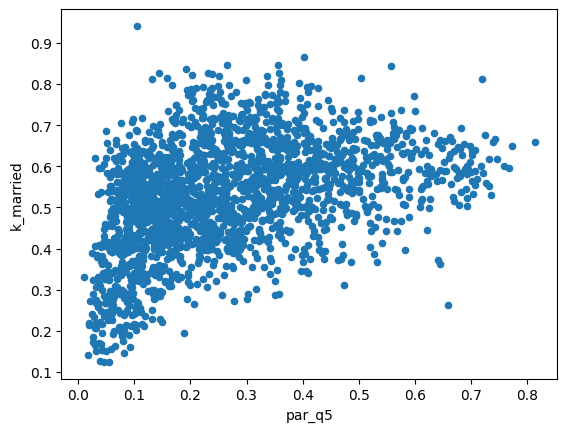

In [95]:
regression = smf.ols('k_married  ~  par_q5' , data=df).fit()
df.plot.scatter(x='par_q5', y='k_married')
regression.summary()

#prediction

u



